## Import Packages

In [232]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets,linear_model, metrics
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

## Import Data Frame 

In [233]:
df = pd.read_csv("C:/Users/Sam/Downloads/census.csv")
# df['bitIncome'] = df['y'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Data frame info 

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  y               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Task I (EDA)

### Majority Classifier Percentage

In [235]:
majority_class = df['y'].mode()[0]

# Calculate the percentage of the majority class
majority_percentage = df['y'].value_counts(normalize=True)[majority_class] * 100
print("Majority Class in Target Variable:", majority_class)
print("Percentage of Majority Class:", majority_percentage)

Majority Class in Target Variable:  <=50K
Percentage of Majority Class: 75.91904425539757


### Target Variable Distribution Graph

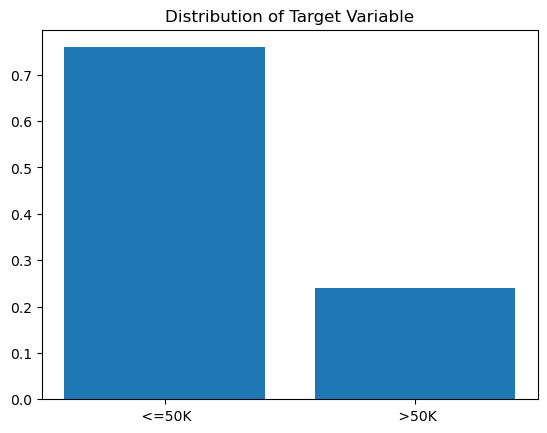

In [236]:
percentage = df['y'].value_counts(normalize=True) 
plt.bar(percentage.index, percentage.values)
plt.title("Distribution of Target Variable")
plt.show()

### Showing Correlations 

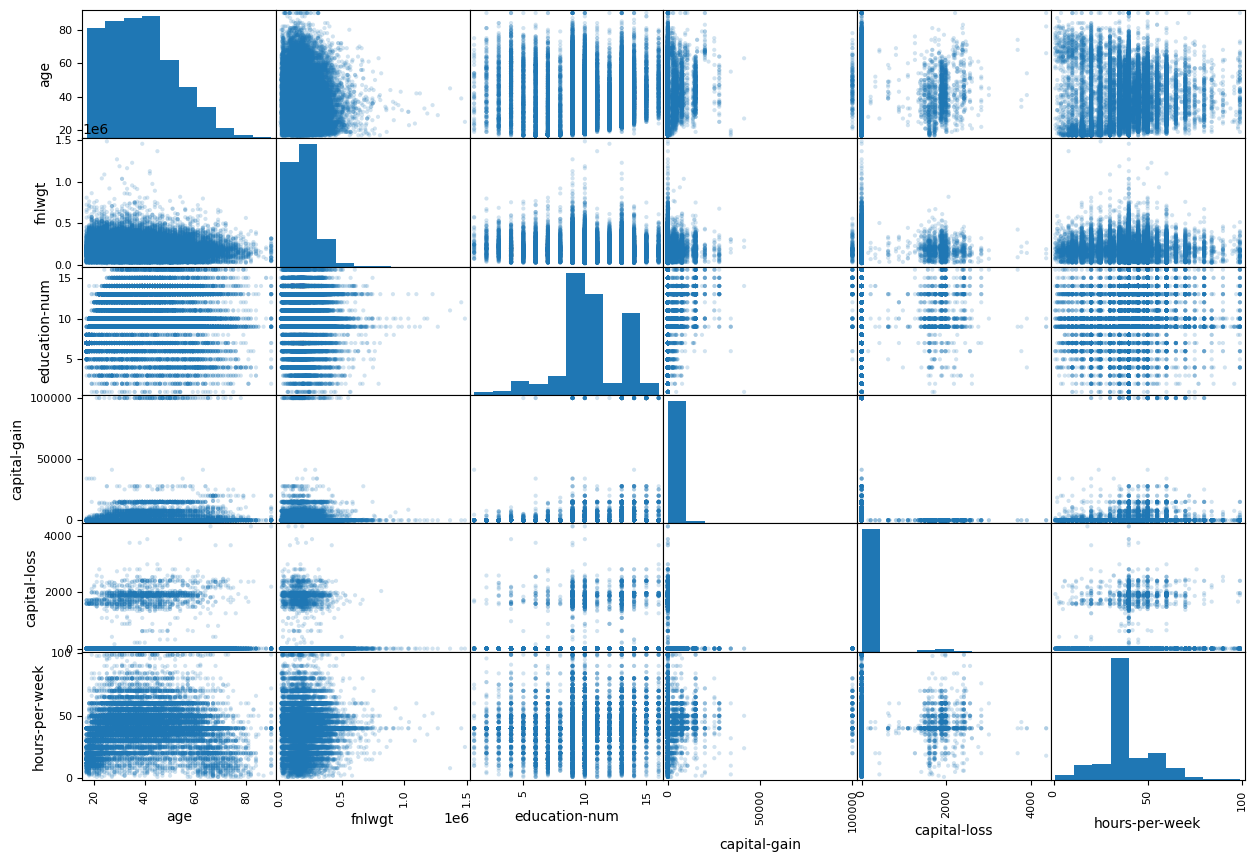

In [237]:
pd.plotting.scatter_matrix(df,figsize=(15, 10),alpha=0.2)
plt.show()

### Plot showing count of race by target 

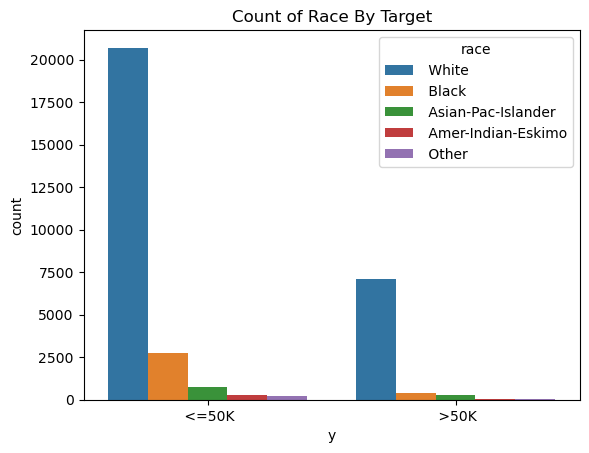

In [238]:
sns.countplot(x='y',hue='race',data=df)
plt.title('Count of Race By Target')
plt.show()

### Plot showing count of sex by target 

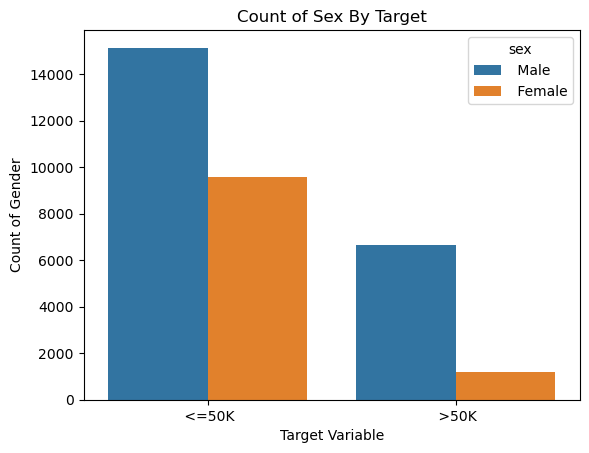

In [239]:
sns.countplot(x='y',hue='sex',data=df)
plt.title('Count of Sex By Target')
plt.xlabel("Target Variable")  
plt.ylabel("Count of Gender")
plt.show()

### Plot of count of family relationship by target 

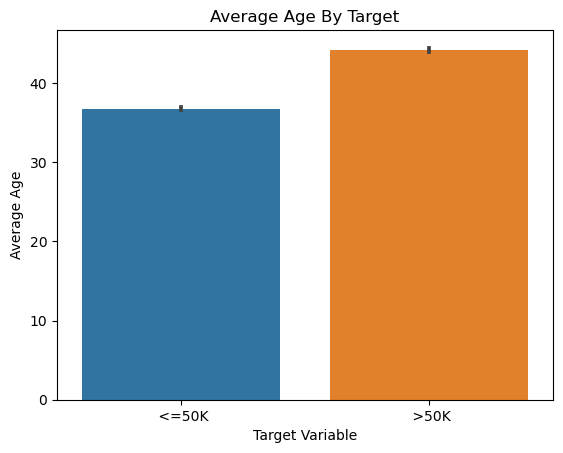

In [240]:
sns.barplot(x='y',y='age',data=df)
plt.title('Average Age By Target')
plt.xlabel("Target Variable")  
plt.ylabel("Average Age")
plt.show()

### Plotting hours of work by target 

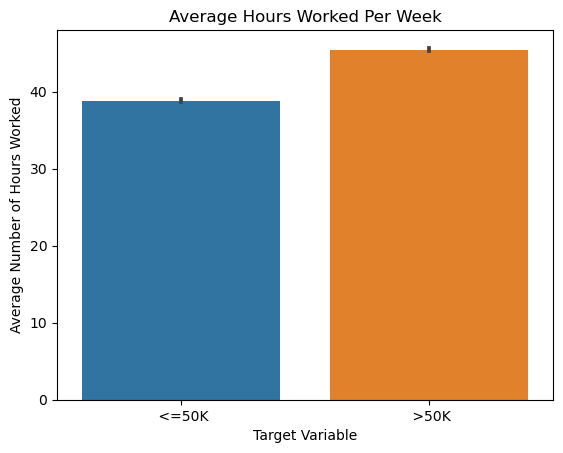

In [241]:
sns.barplot(x='y',y='hours-per-week',data=df)
plt.title('Average Hours Worked Per Week')
plt.xlabel("Target Variable")  
plt.ylabel("Average Number of Hours Worked")
plt.show()

### Plotting years of education by the target variable 

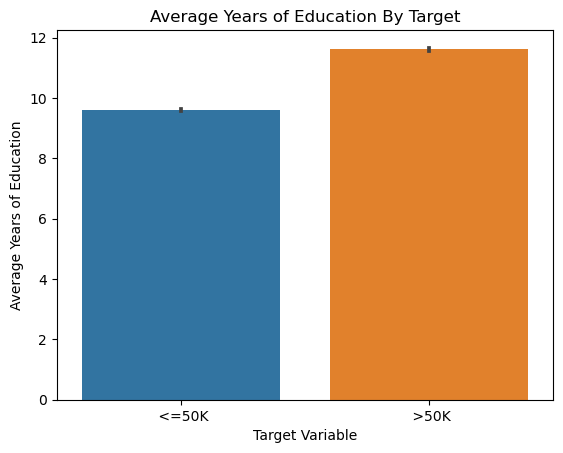

In [242]:
sns.barplot(x='y',y='education-num',data=df)
plt.title("Average Years of Education By Target")
plt.xlabel("Target Variable")
plt.ylabel("Average Years of Education")
plt.show()

### Unsupervised Models Covered In Class 

# Task II (Data Preparation)

### Checking Columns For Null Values 

In [243]:
values =df.isna().sum() / len(df)## Checking for the percent of missing values in each column
values.sort_values(ascending=False)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
y                 0.0
dtype: float64

### One Hot Encoding 

In [257]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical features
X_encoded = encoder.fit_transform(df[categorical_features])

# Create a DataFrame from the encoded features, with appropriate column names
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_columns)

# Optionally, concatenate with the rest of your data (if there are other non-categorical features)
df_other = df.drop(columns=categorical_features)
df_encoded = pd.concat([df_other, X_encoded], axis=1)
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,y,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Creating Train Test Split

In [258]:
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying SMOTE

In [259]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Task III (Model Building) 

### Logistic Regression 

In [260]:
reg = LogisticRegression(random_state=42)
reg.fit(X_train_resampled, y_train_resampled)

## Coefficents 
coefficients = reg.coef_
intercept = reg.intercept_

coefficients_df = pd.DataFrame({'column': X_train_resampled.columns, 'coef': reg.coef_.flatten()})
coefficients_df

,column,coef
0,age,4.325385e-03
1,fnlwgt,-2.683721e-06
2,education-num,9.791603e-04
3,capital-gain,3.083878e-04
4,capital-loss,7.263155e-04
...,...,...
103,native-country_ Thailand,-1.442734e-07
104,native-country_ Trinadad&Tobago,-3.984114e-07
105,native-country_ United-States,-4.180953e-05
106,native-country_ Vietnam,-2.767906e-06


### Creat Predictions

In [261]:
y_test_pred = reg.predict(X_test) ## Generating Predictions

### Evaluation Metrics 

In [262]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.70      0.76      4942
        >50K       0.37      0.55      0.44      1571

    accuracy                           0.66      6513
   macro avg       0.60      0.63      0.60      6513
weighted avg       0.72      0.66      0.68      6513



### Build Decision Tree

In [263]:
tree = DecisionTreeClassifier(max_depth = 3,min_samples_leaf=20,random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

### Creat Predictions

In [264]:
tree_y_test_pred = tree.predict(X_test) ## Generating Predictions

### Evaluation Metrics 

In [265]:
print(f"Accuracy: {accuracy_score(y_test, tree_y_test_pred)}")
print(classification_report(y_test, tree_y_test_pred))

Accuracy: 0.8177491171503147
              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88      4942
        >50K       0.61      0.69      0.65      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.77      0.76      6513
weighted avg       0.83      0.82      0.82      6513



### Plot Decision Tree

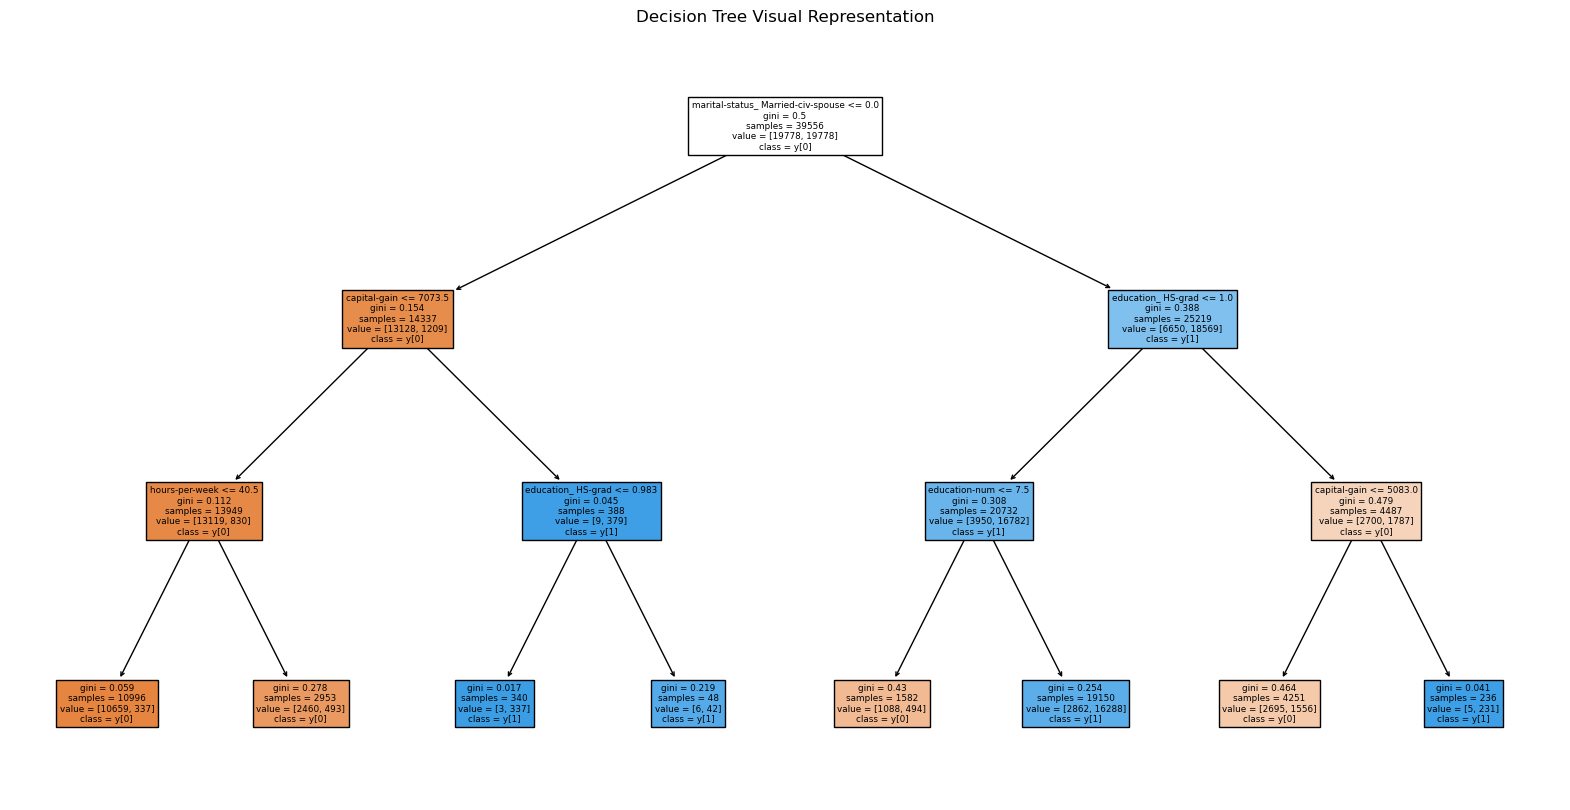

In [266]:
plt.figure(figsize=(20, 10))  # Adjust the size as necessary
plot_tree(tree, filled=True, feature_names=X_train_resampled.columns, class_names=True)
plt.title('Decision Tree Visual Representation')
plt.show()

### Build Naive Bayes Model 

In [267]:
gnb = GaussianNB()
gnb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

### Make Predictions 

In [268]:
gnb_y_pred = gnb.predict(X_test)

### Evaluate Model 

In [270]:
print(f"Accuracy: {accuracy_score(y_test, gnb_y_pred)}")
print(classification_report(y_test, gnb_y_pred))

Accuracy: 0.7965607247044373
              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4942
        >50K       0.66      0.32      0.43      1571

    accuracy                           0.80      6513
   macro avg       0.74      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513



# Task IV (Reflections)